In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/stsdataset.zip" -d "/content/dataset"

Archive:  /content/drive/MyDrive/stsdataset.zip
  inflating: /content/dataset/dataset/A-samples/0.jpg  
  inflating: /content/dataset/dataset/A-samples/1.jpg  
  inflating: /content/dataset/dataset/A-samples/10.jpg  
  inflating: /content/dataset/dataset/A-samples/100.jpg  
  inflating: /content/dataset/dataset/A-samples/11.jpg  
  inflating: /content/dataset/dataset/A-samples/12.jpg  
  inflating: /content/dataset/dataset/A-samples/13.jpg  
  inflating: /content/dataset/dataset/A-samples/14.jpg  
  inflating: /content/dataset/dataset/A-samples/15.jpg  
  inflating: /content/dataset/dataset/A-samples/16.jpg  
  inflating: /content/dataset/dataset/A-samples/17.jpg  
  inflating: /content/dataset/dataset/A-samples/18.jpg  
  inflating: /content/dataset/dataset/A-samples/19.jpg  
  inflating: /content/dataset/dataset/A-samples/2.jpg  
  inflating: /content/dataset/dataset/A-samples/20.jpg  
  inflating: /content/dataset/dataset/A-samples/21.jpg  
  inflating: /content/dataset/dataset/A-sa

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Path to your unzipped dataset
dataset_path = '/content/dataset/dataset'

# Parameters
image_size = (224, 224)  # Resize images to 224x224
batch_size = 32  # Batch size for training

# Create labels for each class (A-Y, skipping J and Z)
class_names = [chr(i) for i in range(ord('A'), ord('Z')+1) if chr(i) not in ['J', 'Z']]

# Create a dictionary for class mapping
class_mapping = {class_name: idx for idx, class_name in enumerate(class_names)}

# Function to load and preprocess the dataset
def load_and_preprocess_data(dataset_path, image_size):
    images = []
    labels = []

    # Check if dataset_path exists
    if not os.path.exists(dataset_path):
        print(f"Dataset path {dataset_path} does not exist!")
        return images, labels

    # List all items in the dataset directory to ensure proper structure
    print(f"Listing contents of dataset path: {dataset_path}")
    print(os.listdir(dataset_path))

    # Loop through each class folder (A, B, C, ..., Y)
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        # Ensure the folder is valid and part of the class names
        if folder_name in class_mapping and os.path.isdir(folder_path):
            print(f"Processing folder: {folder_name}")  # Debugging line
            class_label = class_mapping[folder_name]

            # Now, loop through the subfolders like A-samples, B-samples, etc.
            for subfolder_name in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder_name)

                # Check if the subfolder contains images
                if os.path.isdir(subfolder_path):
                    print(f"  Processing subfolder: {subfolder_name}")  # Debugging line

                    # List contents of the subfolder to check for images
                    print(f"    Listing contents of {subfolder_path}:")
                    print(os.listdir(subfolder_path))

                    # Loop through all images in the subfolder
                    for image_name in os.listdir(subfolder_path):
                        image_path = os.path.join(subfolder_path, image_name)

                        # Check if the file is an image based on extensions
                        if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                            img = cv2.imread(image_path)
                            if img is not None:
                                img = cv2.resize(img, image_size)  # Resize image
                                img = img.astype('float32') / 255.0  # Normalize pixel values
                                images.append(img)
                                labels.append(class_label)
                            else:
                                print(f"Error reading image: {image_path}")  # Debugging line

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess the dataset
images, labels = load_and_preprocess_data(dataset_path, image_size)

# Check if images and labels are loaded correctly
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Convert labels to one-hot encoding
if len(labels) > 0:
    labels = to_categorical(labels, num_classes=len(class_names))

# Check the final shape of images and labels
print(f"Processed Images shape: {images.shape}")
print(f"Processed Labels shape: {labels.shape}")



Listing contents of dataset path: /content/dataset/dataset
['K-samples', 'S-samples', 'N-samples', 'L-samples', 'G-samples', 'I-samples', 'D-samples', 'A-samples', 'E-samples', 'F-samples', 'H-samples', 'X-samples', 'V-samples', 'Y-samples', 'T-samples', 'Q-samples', 'O-samples', 'P-samples', 'M-samples', 'W-samples', 'U-samples', 'B-samples', 'C-samples', 'R-samples']
Images shape: (0,)
Labels shape: (0,)
Processed Images shape: (0,)
Processed Labels shape: (0,)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import os

# Path to your unzipped dataset
dataset_path = '/content/dataset/dataset'

# Parameters
image_size = (224, 224)  # Resize images to 224x224

# Function to load and preprocess the dataset
def load_and_preprocess_data(dataset_path, image_size):
    images = []

    # Loop through each class folder (A, B, C, ..., Y)
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        # Check if the folder contains image files
        if os.path.isdir(folder_path):
            # Loop through the files in the folder (which are image files)
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Check if the file is an image based on extensions
                if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                    print(f"Found image: {image_name} in folder: {folder_name}")  # Debugging line
                    img = cv2.imread(image_path)
                    if img is not None:
                        img = cv2.resize(img, image_size)  # Resize image
                        img = img.astype('float32') / 255.0  # Normalize pixel values
                        images.append(img)
                    else:
                        print(f"Error reading image: {image_path}")  # Print error message

    # Convert images list to numpy array
    images = np.array(images)
    return images

# Load and preprocess the dataset (only images)
images = load_and_preprocess_data(dataset_path, image_size)

# Check if images are loaded correctly
print(f"Images shape before PCA: {images.shape}")

# Flatten the images to 1D arrays (necessary for PCA)
if images.size > 0:  # Check if images array is not empty
    images_flat = images.reshape(images.shape[0], -1)  # Flatten each image

    # Apply PCA to reduce the dimensionality (e.g., reduce to 100 components)
    pca = PCA(n_components=100)  # Adjust number of components as needed
    images_reduced = pca.fit_transform(images_flat)

    # Check the shape after PCA transformation
    print(f"Shape of images after PCA: {images_reduced.shape}")
else:
    print("No images were loaded. Please check the dataset path and file structure.")

Found image: 37.jpg in folder: K-samples
Found image: 15.jpg in folder: K-samples
Found image: 3.jpg in folder: K-samples
Found image: 28.jpg in folder: K-samples
Found image: 79.jpg in folder: K-samples
Found image: 61.jpg in folder: K-samples
Found image: 22.jpg in folder: K-samples
Found image: 88.jpg in folder: K-samples
Found image: 41.jpg in folder: K-samples
Found image: 16.jpg in folder: K-samples
Found image: 30.jpg in folder: K-samples
Found image: 52.jpg in folder: K-samples
Found image: 44.jpg in folder: K-samples
Found image: 21.jpg in folder: K-samples
Found image: 35.jpg in folder: K-samples
Found image: 6.jpg in folder: K-samples
Found image: 90.jpg in folder: K-samples
Found image: 24.jpg in folder: K-samples
Found image: 98.jpg in folder: K-samples
Found image: 67.jpg in folder: K-samples
Found image: 49.jpg in folder: K-samples
Found image: 86.jpg in folder: K-samples
Found image: 38.jpg in folder: K-samples
Found image: 7.jpg in folder: K-samples
Found image: 2.jpg 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import cv2
import os
from collections import Counter

# Path to your unzipped dataset
dataset_path = '/content/dataset/dataset'

# Parameters
image_size = (224, 224)  # Resize images to 224x224

# Function to load and preprocess the dataset
def load_and_preprocess_data(dataset_path, image_size):
    images = []
    labels = []

    # Dictionary to store class counts for imbalance checking
    class_counts = {}

    # Loop through each class folder (A, B, C, ..., Y)
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        # Check if the folder contains image files
        if os.path.isdir(folder_path):
            class_counts[folder_name] = 0  # Initialize count for the class

            # Loop through the files in the folder (which are image files)
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Check if the file is an image based on extensions
                if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                    print(f"Found image: {image_name} in folder: {folder_name}")  # Debugging line
                    img = cv2.imread(image_path)
                    if img is not None:
                        img = cv2.resize(img, image_size)  # Resize image
                        img = img.astype('float32') / 255.0  # Normalize pixel values
                        images.append(img)
                        labels.append(folder_name)  # Add label for class
                        class_counts[folder_name] += 1  # Increment class count
                    else:
                        print(f"Error reading image: {image_path}")  # Print error message

    # Convert images list to numpy array
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_counts

# Load and preprocess the dataset (only images)
images, labels, class_counts = load_and_preprocess_data(dataset_path, image_size)

# Print class distribution (check for class imbalance)
print("\nClass distribution (number of samples per class):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")

Found image: 37.jpg in folder: K-samples
Found image: 15.jpg in folder: K-samples
Found image: 3.jpg in folder: K-samples
Found image: 28.jpg in folder: K-samples
Found image: 79.jpg in folder: K-samples
Found image: 61.jpg in folder: K-samples
Found image: 22.jpg in folder: K-samples
Found image: 88.jpg in folder: K-samples
Found image: 41.jpg in folder: K-samples
Found image: 16.jpg in folder: K-samples
Found image: 30.jpg in folder: K-samples
Found image: 52.jpg in folder: K-samples
Found image: 44.jpg in folder: K-samples
Found image: 21.jpg in folder: K-samples
Found image: 35.jpg in folder: K-samples
Found image: 6.jpg in folder: K-samples
Found image: 90.jpg in folder: K-samples
Found image: 24.jpg in folder: K-samples
Found image: 98.jpg in folder: K-samples
Found image: 67.jpg in folder: K-samples
Found image: 49.jpg in folder: K-samples
Found image: 86.jpg in folder: K-samples
Found image: 38.jpg in folder: K-samples
Found image: 7.jpg in folder: K-samples
Found image: 2.jpg 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  # This will convert string labels to integers
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Rotate images by a random angle within 30 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the image width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the image height
    shear_range=0.2,          # Shear transformation for images
    zoom_range=0.2,           # Zoom in or out by up to 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode="nearest"       # Fill in missing pixels after transformations
)

# Fit the datagen to the training images (this is necessary for data augmentation)
datagen.fit(images)

# Example using Keras model (you would have a model defined previously)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define a simple CNN model for example purposes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(labels_encoded)), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use data augmentation in model training
history = model.fit(datagen.flow(images, labels_encoded, batch_size=32),
                    steps_per_epoch=len(images) // 32,
                    epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.0470 - loss: 5.8530
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 182us/step - accuracy: 0.0000e+00 - loss: 3.1799
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.0261 - loss: 3.1784
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 229us/step - accuracy: 0.0312 - loss: 3.1777
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.0425 - loss: 3.1783
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 305us/step - accuracy: 0.0000e+00 - loss: 3.1795
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.0391 - loss: 3.1782
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 204us/step - accuracy: 0.0000e+00 - loss: 3.1790
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.0402 - loss: 3.1782
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 172us/step - accuracy: 0.0312 - loss: 3.1786


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_training_history(history, title='Training and Validation Metrics'):
    """
    Plot training and validation accuracy and loss from the training history.

    Args:
        history (History): The training history object returned by Keras model.fit().
        title (str): The title of the plot.
    """
    # Extract training and validation metrics
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    # Accuracy plot
    ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss plot
    ax[1].plot(epochs, loss, 'r', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
    plt.show()

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32, epochs=5):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return history, test_accuracy

In [ ]:
def compute_metrics(y_true, y_pred):
    """
    Compute evaluation metrics for model predictions.
    Args:
        y_true: Ground truth labels (one-hot encoded or integer-encoded).
        y_pred: Predicted labels (probabilities or integer-encoded).

    Returns:
        A dictionary with computed metrics (macro and micro averages).
    """
    # Convert y_true (TensorFlow tensor) to a NumPy array
    if isinstance(y_true, tf.Tensor):
        y_true = y_true.numpy()

    # Convert predictions to class indices if they are probabilities
    if len(y_pred.shape) > 1:
        y_pred = y_pred.argmax(axis=1)

    # Convert ground truth from one-hot encoding to class indices
    if len(y_true.shape) > 1:
        y_true = y_true.argmax(axis=1)

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='macro'),
        'F1-Score (Macro)': f1_score(y_true, y_pred, average='macro'),
        'Precision (Micro)': precision_score(y_true, y_pred, average='micro'),
        'Recall (Micro)': recall_score(y_true, y_pred, average='micro'),
        'F1-Score (Micro)': f1_score(y_true, y_pred, average='micro')
    }
    return metrics

Found 2427 files belonging to 24 classes.
Using 1942 files for training.
Found 2427 files belonging to 24 classes.
Using 485 files for validation.
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.1410 - loss: 3.7872 - val_accuracy: 0.0454 - val_loss: 3.4118
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4070 - loss: 2.0075 - val_accuracy: 0.0515 - val_loss: 4.2272
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6640 - loss: 1.1914 - val_accuracy: 0.0495 - val_loss: 5.3226
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8029 - loss: 0.6653 - val_accuracy: 0.0495 - val_loss: 5.9555
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8951 - loss: 0.3745 - val_accuracy: 0.0495 - val_loss: 6.2621
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9534 - loss: 0.1979 - val_accuracy: 0.0784 - val_loss: 6.0507
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9727 - loss: 0.1333 - val_

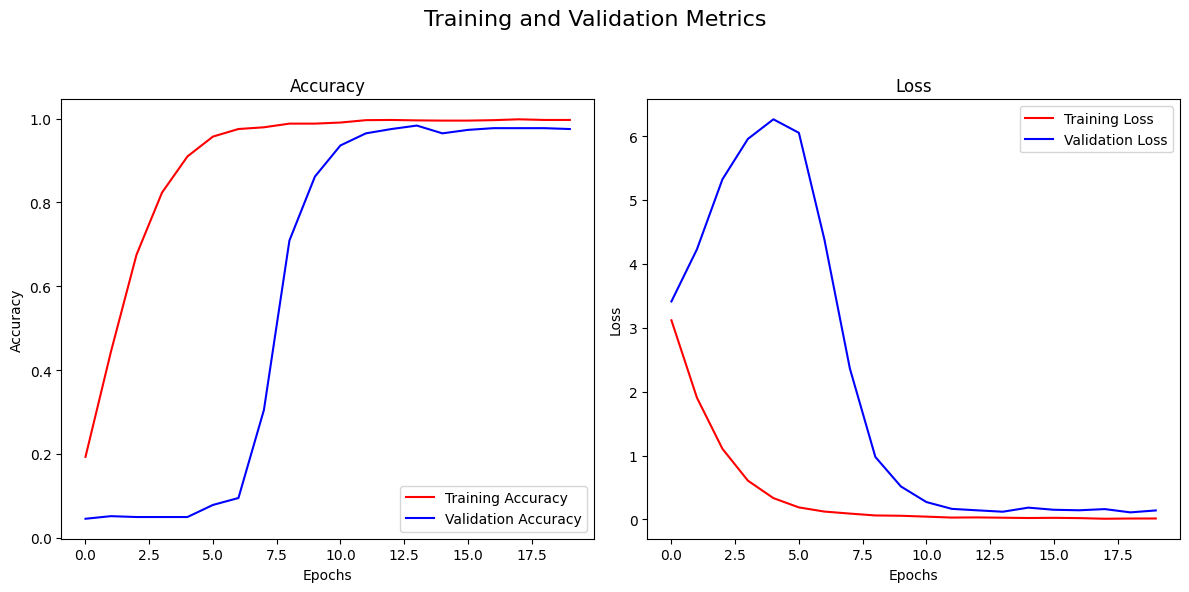

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Step 1: Load Dataset
dataset_path = '/content/dataset/dataset'

# List of class names (excluding 'J' and 'Z')
classes = ['A-samples', 'B-samples', 'C-samples', 'D-samples', 'E-samples', 'F-samples',
           'G-samples', 'H-samples', 'I-samples', 'K-samples', 'L-samples', 'M-samples',
           'N-samples', 'O-samples', 'P-samples', 'Q-samples', 'R-samples', 'S-samples',
           'T-samples', 'U-samples', 'V-samples', 'W-samples', 'X-samples', 'Y-samples']

# Image size for better feature extraction
IMG_SIZE = (128, 128)

# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=classes,
    image_size=IMG_SIZE,
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_dataset = image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=classes,
    image_size=IMG_SIZE,
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Normalize images (scale pixel values between 0 and 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch for performance optimization
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Step 2: Improved CNN Model
def build_improved_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),  # Prevent overfitting
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    return model

# Number of classes
num_classes = len(classes)

# Create the model
cnn_model = build_improved_cnn(input_shape=(128, 128, 3), num_classes=num_classes)

# Step 3: Compile the Model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Step 4: Train the Model
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

# Step 5: Save the Model
cnn_model.save("improved_cnn_model.h5")

# Plot training & validation metrics
import matplotlib.pyplot as plt

def plot_training_history(history, title='Training and Validation Metrics'):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'r', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot the training history
plot_training_history(history)

In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,466,634 (97.15 MB)

 Trainable params: 8,488,728 (32.38 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 16,977,458 (64.76 MB)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Make Predictions on the Test Set (Validation Set in this case)
# Predict on the validation dataset (as it's the test dataset in this case)
y_pred_probs = cnn_model.predict(val_dataset)  # Predicted probabilities

# Convert predictions to class indices (argmax)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get the True Labels (ground truth) from the Validation Set
y_true = np.concatenate([y for x, y in val_dataset], axis=0)  # Get the true labels from the validation set

# Step 3: Compute Metrics (Macro and Micro)
def compute_metrics(y_true, y_pred):
    """
    Compute evaluation metrics for model predictions.
    Args:
        y_true: Ground truth labels (integer-encoded).
        y_pred: Predicted labels (integer-encoded).

    Returns:
        A dictionary with computed metrics (macro and micro averages).
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='macro'),
        'F1-Score (Macro)': f1_score(y_true, y_pred, average='macro'),
        'Precision (Micro)': precision_score(y_true, y_pred, average='micro'),
        'Recall (Micro)': recall_score(y_true, y_pred, average='micro'),
        'F1-Score (Micro)': f1_score(y_true, y_pred, average='micro')
    }
    return metrics

# Compute and display metrics
metrics = compute_metrics(y_true, y_pred)

print("\n--- Basic CNN Metrics ---")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 460ms/step

--- Basic CNN Metrics ---
Accuracy: 0.9753
Precision (Macro): 0.9773
Recall (Macro): 0.9760
F1-Score (Macro): 0.9751
Precision (Micro): 0.9753
Recall (Micro): 0.9753
F1-Score (Micro): 0.9753


In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Load dataset
dataset_path = '/content/dataset'
image_size = (64, 64)  # Use a reasonable size
batch_size = 32
num_classes = 24  # Your dataset has 24 classes

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    label_mode='int',
    image_size=image_size,
    batch_size=batch_size
)

# Normalize images
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

# Convert dataset to NumPy arrays for k-fold splitting
X = np.concatenate([x.numpy() for x, y in dataset], axis=0)
y = np.concatenate([y.numpy() for x, y in dataset], axis=0)

# Define CNN model function
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Implement k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nTraining on Fold {fold+1}/{k}...\n")

    # Split the dataset
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to TensorFlow dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

    # Create a new model for each fold
    model = create_model()

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=1)

    # Evaluate on validation set
    scores = model.evaluate(val_dataset, verbose=0)
    print(f"Fold {fold+1} - Loss: {scores[0]} - Accuracy: {scores[1]}")

    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

# Print Final Cross-Validation Results
print(f"\nAverage Accuracy: {np.mean(acc_per_fold)} ± {np.std(acc_per_fold)}")
print(f"Average Loss: {np.mean(loss_per_fold)} ± {np.std(loss_per_fold)}")

Found 2427 files belonging to 1 classes.

Training on Fold 1/5...

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.9240 - loss: 0.2792 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - a

In [ ]:
model.save("sign_language_model.h5")  # Save the trained model

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("sign_language_model.h5")

# Check if the model is loaded
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,250 (6.21 MB)

 Trainable params: 1,628,248 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [ ]:
import mediapipe as mp

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load CNN Model
model = load_model("sign_language_model.h5")
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]  # Sign classes

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# Start Webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract Hand Region
            x_min = min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1]
            y_min = min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0]
            x_max = max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1]
            y_max = max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0]

            # Crop & Preprocess Hand Image
            hand_img = frame[int(y_min):int(y_max), int(x_min):int(x_max)]
            hand_img = cv2.resize(hand_img, (64, 64)) / 255.0  # Resize & Normalize
            hand_img = np.expand_dims(hand_img, axis=0)

            # Predict Sign
            prediction = model.predict(hand_img)
            predicted_label = class_labels[np.argmax(prediction)]

            # Display Prediction
            cv2.putText(frame, f"Sign: {predicted_label}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Sign Language Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS
import os

def text_to_speech(text):
    tts = gTTS(text=text, lang="en")
    tts.save("output.mp3")
    os.system("start output.mp3")  # Windows (use 'afplay output.mp3' on Mac)

# Example: Convert Recognized Sign "Hello" to Speech
recognized_text = "Hello"
text_to_speech(recognized_text)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features from images
features = feature_extractor.predict(images)
print(f"Feature shape before flattening: {features.shape}")

# Flatten features for ML models
features_flattened = features.reshape(features.shape[0], -1)  # Convert to 1D
print(f"Feature shape after flattening: {features_flattened.shape}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1572s 21s/step
Feature shape before flattening: (2427, 7, 7, 512)
Feature shape after flattening: (2427, 25088)


In [ ]:
# Print some sample labels to verify
if 'labels' in locals():
    print(f"Sample Labels: {labels[:5]}")
    print(f"Total Labels: {len(labels)}")
else:
    print("Error: 'labels' variable not found. Check dataset loading function.")

Sample Labels: ['K-samples' 'K-samples' 'K-samples' 'K-samples' 'K-samples']
Total Labels: 2427


In [ ]:
# Remove "-samples" from labels
cleaned_labels = [label.split("-")[0] for label in labels]  # Extract only the letter
labels = np.array(cleaned_labels)  # Convert back to NumPy array

# Print cleaned labels
print(f"Cleaned Labels: {labels[:5]}")  # Should print ['I', 'I', 'I', 'I', 'I']

Cleaned Labels: ['K' 'K' 'K' 'K' 'K']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the cleaned labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Print encoded labels
print(f"Encoded Labels: {labels_encoded[:5]}")  # Should now be numeric
print(f"Total Unique Classes: {len(label_encoder.classes_)}")  # Should be 24 (A-Y excluding J, Z)

Encoded Labels: [9 9 9 9 9]
Total Unique Classes: 24


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_flattened, labels_encoded, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Training Samples: 1941, Testing Samples: 486


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_flattened, labels_encoded, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Decision Tree Accuracy: 0.8806584362139918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.81      0.85        21
           2       0.88      0.88      0.88        16
           3       0.88      1.00      0.93        21
           4       0.95      0.95      0.95        20
           5       0.91      0.95      0.93        21
           6       0.76      0.79      0.78        33
           7       0.86      0.90      0.88        21
           8       0.84      0.84      0.84        19
           9       0.89      0.94      0.91        17
          10       1.00      1.00      1.00        15
          11       0.84      0.67      0.74        24
          12       0.91      0.74      0.82        27
          13       0.91      0.95      0.93        21
          14       0.89      0.89      0.89        27
          15       0.94      0.84      0.89        19
          16       0.80      0.84     

In [ ]:
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time

#  Step 1: Reduce Dimensions with PCA (100 components)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#  Step 2: Train XGBoost with CPU Optimization
xgb_model = XGBClassifier(
    eval_metric='mlogloss',
    n_estimators=50,        # Reduce trees for faster training
    max_depth=6,            # Limit tree depth for efficiency
    learning_rate=0.1,      # Adjust learning rate for better convergence
    n_jobs=-1,              # Use all available CPU cores
    random_state=42
)

#  Step 3: Measure Training Time
start_time = time.time()
xgb_model.fit(X_train_pca, y_train)
end_time = time.time()

print(f" XGBoost Training Time (CPU): {end_time - start_time:.2f} seconds")

#  Step 4: Make Predictions & Evaluate
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f" XGBoost Model Accuracy: {accuracy:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

✅ XGBoost Training Time (CPU): 13.91 seconds
🎯 XGBoost Model Accuracy: 0.9465

🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16
           3       0.95      1.00      0.98        21
           4       0.77      1.00      0.87        20
           5       1.00      1.00      1.00        21
           6       0.94      0.94      0.94        33
           7       0.90      0.90      0.90        21
           8       0.90      1.00      0.95        19
           9       0.89      1.00      0.94        17
          10       1.00      1.00      1.00        15
          11       1.00      0.83      0.91        24
          12       0.95      0.74      0.83        27
          13       1.00      1.00      1.00        21
          14       0.96      0.93      0.94        27
          15       0.90      1.

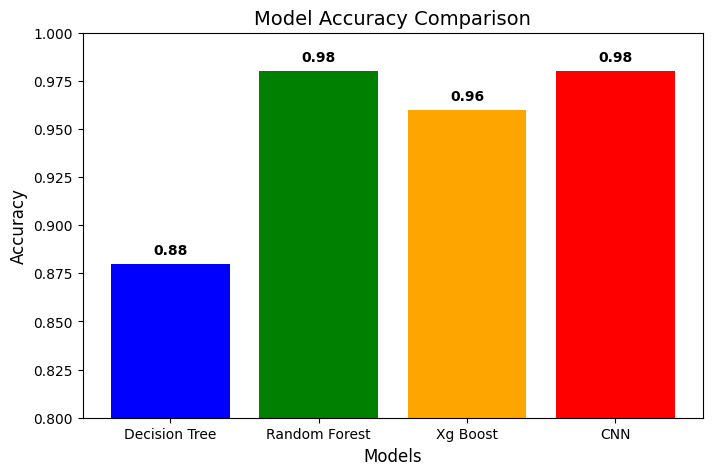

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["Decision Tree", "Random Forest", "Xg Boost", "CNN"]

# Accuracy values
accuracy = [0.88, 0.98, 0.96, 0.98]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'green', 'orange', 'red'])

# Adding title and labels
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.8, 1.0)  # Setting y-axis limits for better visualization

# Display accuracy values on bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, str(v), ha='center', fontsize=10, fontweight='bold')

# Show plot
plt.show()